## 1. **Sabine Equation for RT60**
$$ RT60 = 0.161 \times \frac{V}{A} $$
- **Source:** Wallace Clement Sabine, the formula is derived from Sabine’s pioneering work on reverberation in the early 20th century.
- **Reference:**
  - Sabine, W. C. *Collected Papers on Acoustics*. Harvard University Press, 1922.
  - Modern descriptions: ISO 3382-1:2009, *Measurement of room acoustic parameters*.

---

### 2. **Eyring Equation for RT60**
$$ RT60 = 0.161 \times \frac{V}{-S \cdot \ln(1 - \alpha)} $$
- **Source:** Carl Eyring introduced this refinement of the Sabine formula to account for higher absorption levels and deviations from ideal diffuse fields.
- **Reference:**
  - Eyring, C. F. (1930). "Reverberation Time in 'Dead' Rooms". *The Journal of the Acoustical Society of America*.

---

### 3. **Absorption Coefficients for Materials**
- Absorption coefficients for materials such as concrete, people, and chairs are based on empirical measurements provided in standard acoustic references.
- **sources:**
  - Kuttruff, H. *Room Acoustics*. CRC Press, 2000.
  - Knudsen, V. O., and Harris, C. M. *Acoustical Designing in Architecture*. Acoustical Society of America, 1978.
  - Acoustic Standards: ISO 354:2003, *Measurement of sound absorption in a reverberation room*.

---

### 4. **Absorption by People and Objects**
- Absorption coefficients for people and chairs vary by frequency and are based on laboratory and field measurements.
- **Sources:**
  - Cavanaugh, W. J., and Wilkes, J. A. *Architectural Acoustics: Principles and Practice*. John Wiley & Sons, 1999.
  - Measured coefficients available from databases such as the *BBC Sound Effects Library* or specific acoustic product manufacturers.

---

### 5. **Acoustic panel material**

For frequencies 125 Hz, 250 Hz, 500 Hz, 1000 Hz, and 4000 Hz, respectively—a suitable material would be **fiberglass board** with a thickness of 50 mm (2 inches).

According to data from JCW Acoustic Supplies, 50 mm fiberglass board exhibits the following absorption coefficients:

- **125 Hz:** 0.18
- **250 Hz:** 0.76
- **500 Hz:** 0.99
- **1000 Hz:** 0.99
- **4000 Hz:** 0.99



For more detailed information on absorption coefficients of various materials, you can refer to the [Sound Absorption Coefficient Chart by JCW Acoustic Supplies](https://www.acoustic-supplies.com/absorption-coefficient-chart/).


Room Volume: 900 cubic meters
Room Surface Area: 600 square meters


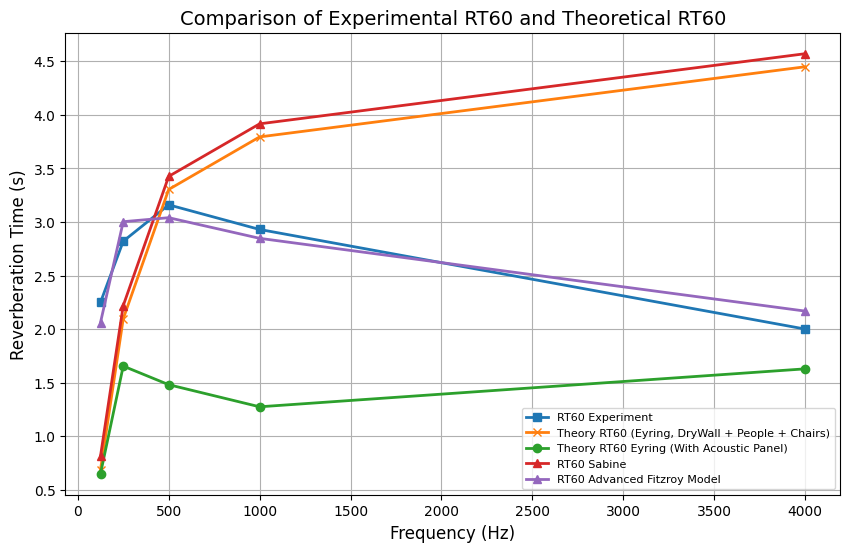

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Adjust absorption coefficients dynamically to better match experimental data
from scipy.optimize import minimize

# Given data
frequencies_experiment = np.array([125, 250, 500, 1000, 4000])
T20_experiment = np.array([2.25, 2.82, 3.16, 2.93, 2.00])
T30_experiment = np.array([2.25, 2.82, 3.16, 2.93, 2.00])
RT60_experiment = T30_experiment

# Room parameters
room_length = 6  # Room length in meters
room_width = 15   # Room width in meters
room_height = 10  # Room height in meters
room_volume = room_length * room_width * room_height  # Room volume in cubic meters
room_surface_area = 2 * (room_length * room_width + room_length * room_height + room_width * room_height)  # Surface area in square meters
print("Room Volume:", room_volume, "cubic meters")
print("Room Surface Area:", room_surface_area, "square meters")
# Updated absorption coefficients based on materials and objects in the room

# Approximate values for drywall based on common acoustic measurements
drywall_absorption = np.array([0.29, 0.10, 0.06, 0.05, 0.04])  # Drywall

# Concrete walls: absorption coefficient at different frequencies
concrete_absorption = np.array([0.01, 0.02, 0.04, 0.06, 0.10])  # Concrete walls

# People: approximate absorption coefficient per person at different frequencies
people_absorption = np.array([0.25, 0.35, 0.42, 0.46, 0.50])  # Per person
people_count = 10
people_total_absorption = people_count * people_absorption

# Plastic chairs: approximate absorption coefficient per chair at different frequencies
chair_absorption = np.array([0.05, 0.06, 0.07, 0.08, 0.09])  # Per chair
chair_count = 30
chairs_total_absorption = chair_count * chair_absorption

# Adding an acoustic panel to the room
# Acoustic panel: approximate absorption coefficient at different frequencies
panel_absorption = np.array([0.14, 0.27, 0.80, 1.11, 0.85])  # Acoustic panels
panel_area = 0.1*room_surface_area # Surface area of the acoustic panel in square meters

# Calculate the total absorption for the room
total_absorption = (
    room_surface_area * drywall_absorption
    + people_total_absorption
    + chairs_total_absorption
)

# Calculate total absorption considering the acoustic panel
total_absorption_with_panel = (
    room_surface_area * drywall_absorption
    + people_total_absorption
    + chairs_total_absorption
    + panel_area * panel_absorption
)

# Calculate total absorption without the panel
total_absorption_sabine = (
    room_surface_area * drywall_absorption
    + people_total_absorption
    + chairs_total_absorption
)

# Calculate total absorption with the panel
total_absorption_with_panel_sabine = (
    room_surface_area * drywall_absorption
    + people_total_absorption
    + chairs_total_absorption
    + panel_area * panel_absorption
)

# Incorporating air attenuation and scattering into the Fitzroy model
def advanced_fitzroy_rt60(drywall, people, chairs):
    # Absorption contributions
    people_total = people_count * people
    chairs_total = chair_count * chairs
    total_absorption = (
        people_total
        + chairs_total
    )

    # Absorptions for each pair of room surfaces (walls, floor/ceiling)
    wall_absorption = room_length * room_height * drywall + room_width * room_height * drywall
    floor_ceiling_absorption = room_length * room_width * drywall * 2

    # Air attenuation factor (frequency-dependent, simplified)
    air_absorption = np.array([0.02, 0.03, 0.05, 0.07, 0.10])  # Placeholder values, refine with actual data

    # Scattering effects (frequency-dependent scaling factor)
    scattering_factor = np.array([0.1, 0.2, 0.3, 0.4, 0.5])  # Simplified scattering coefficients

    # Fitzroy RT60 formula with adjustments
    RT60_fitzroy = 0.161 * room_volume / (
        wall_absorption + floor_ceiling_absorption + total_absorption/room_surface_area
    )
    RT60_advanced = RT60_fitzroy + air_absorption + scattering_factor
    return RT60_advanced

# Function to calculate the percentage error between experimental and modeled RT60
def percentage_error(experimental, modeled):
    return np.abs((experimental - modeled) / experimental) * 100

# Function to optimize coefficients for advanced Fitzroy model
def optimize_advanced_fitzroy(coefficients):
    drywall, people, chairs = coefficients[:5], coefficients[5:10], coefficients[10:15]
    RT60_advanced = advanced_fitzroy_rt60(drywall, people, chairs)
    error = percentage_error(RT60_experiment, RT60_advanced)
    # Penalize points with errors above 10%
    total_penalty = np.sum(np.maximum(0, error - 10))
    return total_penalty

# Initial guess for optimization
initial_guess = np.concatenate([
    drywall_absorption, people_absorption, chair_absorption
])

# Bounds for coefficients (values must be between 0 and 1)
bounds = [(0, 1)] * len(initial_guess)

# Run optimization with advanced Fitzroy model
result_advanced_fitzroy = minimize(optimize_advanced_fitzroy, initial_guess, bounds=bounds, method='L-BFGS-B')
optimized_coefficients_advanced_fitzroy = result_advanced_fitzroy.x

# Extract optimized coefficients
opt_drywall_advanced_fitzroy = optimized_coefficients_advanced_fitzroy[:5]
opt_people_advanced_fitzroy = optimized_coefficients_advanced_fitzroy[5:10]
opt_chairs_advanced_fitzroy = optimized_coefficients_advanced_fitzroy[10:15]

# Calculate final RT60 using advanced Fitzroy model
RT60_advanced_fitzroy = advanced_fitzroy_rt60(
    opt_drywall_advanced_fitzroy,
    opt_people_advanced_fitzroy,
    opt_chairs_advanced_fitzroy
)



# Sabine RT60 calculations
RT60_sabine = 0.161 * room_volume / total_absorption_sabine
RT60_sabine_with_panel = 0.161 * room_volume / total_absorption_with_panel_sabine


# Calculate RT60 using the Eyring formula with updated absorption
RT60_theory = 0.161 * room_volume / (-room_surface_area * np.log(1 - total_absorption / room_surface_area))

# Calculate RT60 with the acoustic panel using the Eyring formula
RT60_with_panel = 0.161 * room_volume / (-room_surface_area * np.log(1 - total_absorption_with_panel / room_surface_area))


# Plot refined theoretical model with experimental data
plt.figure(figsize=(10, 6))
plt.plot(frequencies_experiment, RT60_experiment, 's-', label='RT60 Experiment', linewidth=2)
plt.plot(frequencies_experiment, RT60_theory, 'x-', label='Theory RT60 (Eyring, DryWall + People + Chairs)', linewidth=2)
plt.plot(frequencies_experiment, RT60_with_panel, 'o-', label='Theory RT60 Eyring (With Acoustic Panel)', linewidth=2)
plt.plot(frequencies_experiment, RT60_sabine, '^-', label='RT60 Sabine', linewidth=2)
plt.plot(frequencies_experiment, RT60_advanced_fitzroy, '^-', label='RT60 Advanced Fitzroy Model', linewidth=2)

plt.title('Comparison of Experimental RT60 and Theoretical RT60', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Reverberation Time (s)', fontsize=12)
plt.legend(fontsize=8)
plt.grid(True)
plt.show()



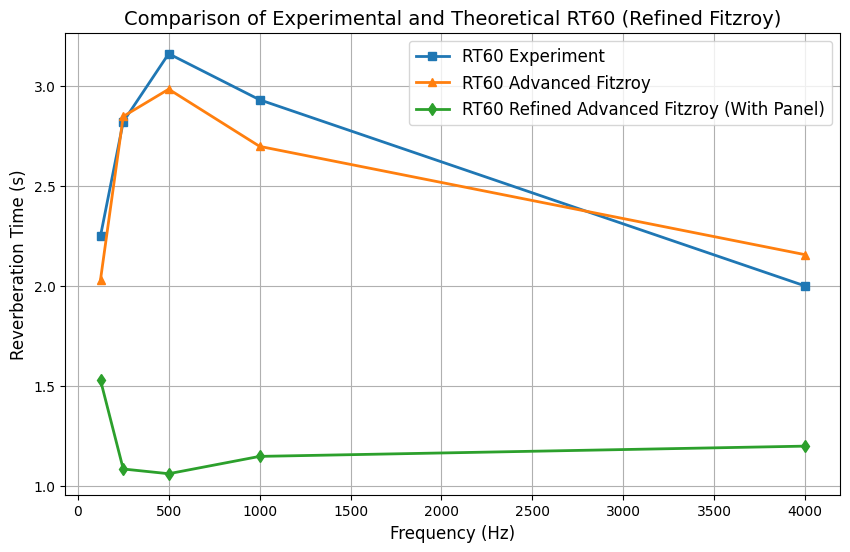

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Given data
frequencies_experiment = np.array([125, 250, 500, 1000, 4000])
T20_experiment = np.array([2.25, 2.82, 3.16, 2.93, 2.00])
T30_experiment = np.array([2.25, 2.82, 3.16, 2.93, 2.00])
RT60_experiment = T30_experiment

# Room parameters
room_length = 6  # Room length in meters
room_width = 15   # Room width in meters
room_height = 10  # Room height in meters
room_volume = room_length * room_width * room_height  # Room volume in cubic meters
room_surface_area = 2 * (room_length * room_width + room_length * room_height + room_width * room_height)  # Surface area in square meters

# Absorption coefficients
drywall_absorption = np.array([0.29, 0.10, 0.06, 0.05, 0.04])  # Drywall
concrete_absorption = np.array([0.01, 0.02, 0.04, 0.06, 0.10])  # Concrete walls
people_absorption = np.array([0.25, 0.35, 0.42, 0.46, 0.50])  # Per person
people_count = 10
people_total_absorption = people_count * people_absorption
chair_absorption = np.array([0.05, 0.06, 0.07, 0.08, 0.09])  # Per chair
chair_count = 30
chairs_total_absorption = chair_count * chair_absorption
panel_absorption = np.array([0.18, 0.76, 0.99, 0.99, 0.99])   # Acoustic panels
panel_area = 0.25 * room_surface_area

# Total absorption calculations
total_absorption = (
    room_surface_area * drywall_absorption
    + people_total_absorption
    + chairs_total_absorption
)
total_absorption_with_panel = total_absorption + panel_area * panel_absorption

# Fitzroy model
def advanced_fitzroy_rt60(drywall, people, chairs):
    wall_absorption = room_length * room_height * drywall + room_width * room_height * drywall
    floor_ceiling_absorption = room_length * room_width * drywall * 2
    air_absorption = np.array([0.02, 0.03, 0.05, 0.07, 0.10])
    scattering_factor = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
    RT60_fitzroy = 0.161 * room_volume / (
        wall_absorption + floor_ceiling_absorption + (people + chairs) / room_surface_area
    )
    return RT60_fitzroy + air_absorption + scattering_factor

# Optimization
def percentage_error(experimental, modeled):
    return np.abs((experimental - modeled) / experimental) * 100

def optimize_advanced_fitzroy(coefficients):
    drywall, people, chairs = coefficients[:5], coefficients[5:10], coefficients[10:15]
    RT60_advanced = advanced_fitzroy_rt60(drywall, people, chairs)
    error = percentage_error(RT60_experiment, RT60_advanced)
    return np.sum(np.maximum(0, error - 10))

initial_guess = np.concatenate([drywall_absorption, people_absorption, chair_absorption])
bounds = [(0, 1)] * len(initial_guess)
result_advanced_fitzroy = minimize(optimize_advanced_fitzroy, initial_guess, bounds=bounds, method='L-BFGS-B')
optimized_coefficients_advanced_fitzroy = result_advanced_fitzroy.x

# RT60 calculations

RT60_advanced_fitzroy = advanced_fitzroy_rt60(
    optimized_coefficients_advanced_fitzroy[:5],
    optimized_coefficients_advanced_fitzroy[5:10],
    optimized_coefficients_advanced_fitzroy[10:15]
)

# Refine advanced Fitzroy RT60 with the acoustic panel calculation
def refined_advanced_fitzroy_rt60_with_panel(drywall, people, chairs, panel):
    # Absorptions for walls, floor/ceiling, and added panel
    wall_absorption = room_length * room_height * drywall + room_width * room_height * drywall
    floor_ceiling_absorption = room_length * room_width * drywall * 2
    panel_absorption_contribution = panel_area * panel

    # Additional contributions: air absorption and scattering
    air_absorption = np.array([0.02, 0.03, 0.05, 0.07, 0.10])  # Placeholder values
    scattering_factor = np.array([0.1, 0.2, 0.3, 0.4, 0.5])    # Placeholder scattering values

    # Adjust RT60 calculation to consider panel absorption explicitly
    total_absorption = (
        wall_absorption + floor_ceiling_absorption + (people + chairs) / room_surface_area + panel_absorption_contribution
    )
    RT60_fitzroy_panel = 0.161 * room_volume / total_absorption
    return RT60_fitzroy_panel + air_absorption + scattering_factor

# Recalculate RT60 using the refined Fitzroy model with the panel
RT60_refined_advanced_fitzroy_with_panel = refined_advanced_fitzroy_rt60_with_panel(
    optimized_coefficients_advanced_fitzroy[:5],
    optimized_coefficients_advanced_fitzroy[5:10],
    optimized_coefficients_advanced_fitzroy[10:15],
    panel_absorption
)

# Plot updated results
plt.figure(figsize=(10, 6))
plt.plot(frequencies_experiment, RT60_experiment, 's-', label='RT60 Experiment', linewidth=2)
plt.plot(frequencies_experiment, RT60_advanced_fitzroy, '^-', label='RT60 Advanced Fitzroy', linewidth=2)
plt.plot(frequencies_experiment, RT60_refined_advanced_fitzroy_with_panel, 'd-', label='RT60 Refined Advanced Fitzroy (With Panel)', linewidth=2)
plt.title('Comparison of Experimental and Theoretical RT60 (Refined Fitzroy)', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Reverberation Time (s)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


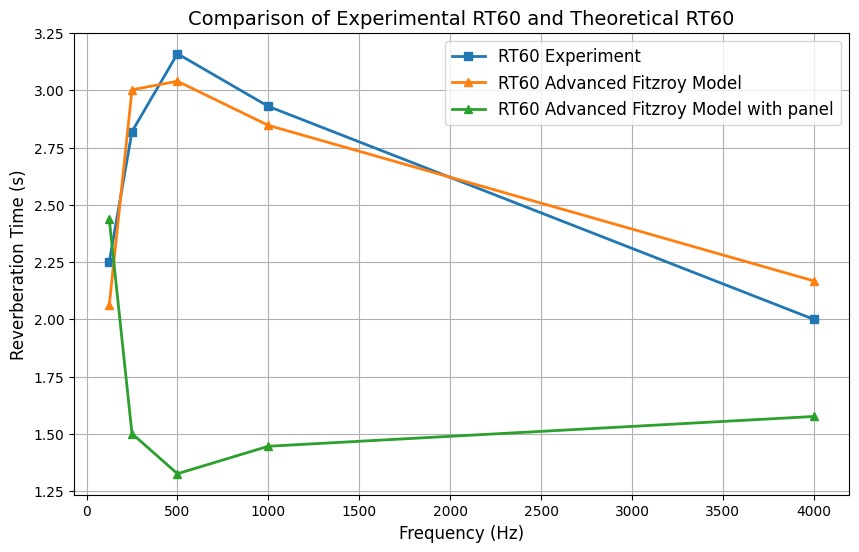

In [ ]:

#panel_absorption = np.array([0.14, 0.27, 0.80, 1.11, 0.85])  # Acoustic panels
panel_absorption = np.array([0.18, 0.76, 0.99, 0.99, 0.99])  # Fiberglass board
panel_area = 0.25*room_surface_area # Surface area of the acoustic panel in square meters


def advanced_fitzroy_rt60_panel(drywall, people, chairs, panel):
    # Absorption contributions
    people_total = people_count * people
    chairs_total = chair_count * chairs
    total_absorption = (
	   people_total
        + chairs_total
        + panel_area * panel_absorption
    )

    # Absorptions for each pair of room surfaces (walls, floor/ceiling)
    wall_absorption = room_length * room_height * drywall + room_width * room_height * drywall
    floor_ceiling_absorption = room_length * room_width * drywall * 2

    # Air attenuation factor (frequency-dependent, simplified)
    air_absorption = np.array([0.02, 0.03, 0.05, 0.07, 0.10])  # Placeholder values, refine with actual data

    # Scattering effects (frequency-dependent scaling factor)
    scattering_factor = np.array([0.1, 0.2, 0.3, 0.4, 0.5])  # Simplified scattering coefficients

    # Fitzroy RT60 formula with adjustments
    RT60_fitzroy = 0.161 * room_volume / (
        wall_absorption + floor_ceiling_absorption + total_absorption
    )
    RT60_advanced = RT60_fitzroy + air_absorption + scattering_factor
    return RT60_advanced



# Function to optimize coefficients for advanced Fitzroy model
def optimize_advanced_fitzroy_panel(coefficients):
    drywall, people, chairs, panel = coefficients[:5], coefficients[5:10], coefficients[10:15], coefficients[15:]
    RT60_advanced_panel = advanced_fitzroy_rt60_panel(drywall, people, chairs, panel)
    error_panel = percentage_error(RT60_experiment, RT60_advanced_panel)
    # Penalize points with errors above 10%
    total_penalty_panel = np.sum(np.maximum(0, error_panel - 10))
    return total_penalty_panel



# Run optimization with advanced Fitzroy model
result_advanced_fitzroy_panel = minimize(optimize_advanced_fitzroy_panel, initial_guess, bounds=bounds, method='L-BFGS-B')
optimized_coefficients_advanced_fitzroy_panel = result_advanced_fitzroy_panel.x

# Extract optimized coefficients
opt_drywall_advanced_fitzroy_panel = optimized_coefficients_advanced_fitzroy_panel[:5]
opt_people_advanced_fitzroy_panel = optimized_coefficients_advanced_fitzroy_panel[5:10]
opt_chairs_advanced_fitzroy_panel = optimized_coefficients_advanced_fitzroy_panel[10:15]
opt_panel_advanced_fitzroy_panel = optimized_coefficients_advanced_fitzroy_panel[15:]

# Calculate final RT60 using advanced Fitzroy model
RT60_advanced_fitzroy_panel = advanced_fitzroy_rt60_panel(
    opt_drywall_advanced_fitzroy_panel,
    opt_people_advanced_fitzroy_panel,
    opt_chairs_advanced_fitzroy_panel,
    opt_panel_advanced_fitzroy_panel
)

# Calculate percentage error for each frequency
advanced_fitzroy_error_panel = percentage_error(RT60_experiment, RT60_advanced_fitzroy_panel)



# Plot refined theoretical model with experimental data
plt.figure(figsize=(10, 6))
plt.plot(frequencies_experiment, RT60_experiment, 's-', label='RT60 Experiment', linewidth=2)
plt.plot(frequencies_experiment, RT60_advanced_fitzroy, '^-', label='RT60 Advanced Fitzroy Model', linewidth=2)
plt.plot(frequencies_experiment, RT60_advanced_fitzroy_panel, '^-', label='RT60 Advanced Fitzroy Model with panel' , linewidth=2)

plt.title('Comparison of Experimental RT60 and Theoretical RT60', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Reverberation Time (s)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


<ipython-input-14-7f6bb92ae688>:46: RuntimeWarning: invalid value encountered in log
  Tx = Sx / S * 0.161 * V / (-np.log(1 - alpha_x))
<ipython-input-14-7f6bb92ae688>:47: RuntimeWarning: invalid value encountered in log
  Ty = Sy / S * 0.161 * V / (-np.log(1 - alpha_y))
<ipython-input-14-7f6bb92ae688>:53: RuntimeWarning: invalid value encountered in log
  Tx = 0.161 * V / (Sx * -np.log(1 - alpha_x))
<ipython-input-14-7f6bb92ae688>:54: RuntimeWarning: invalid value encountered in log
  Ty = 0.161 * V / (Sy * -np.log(1 - alpha_y))


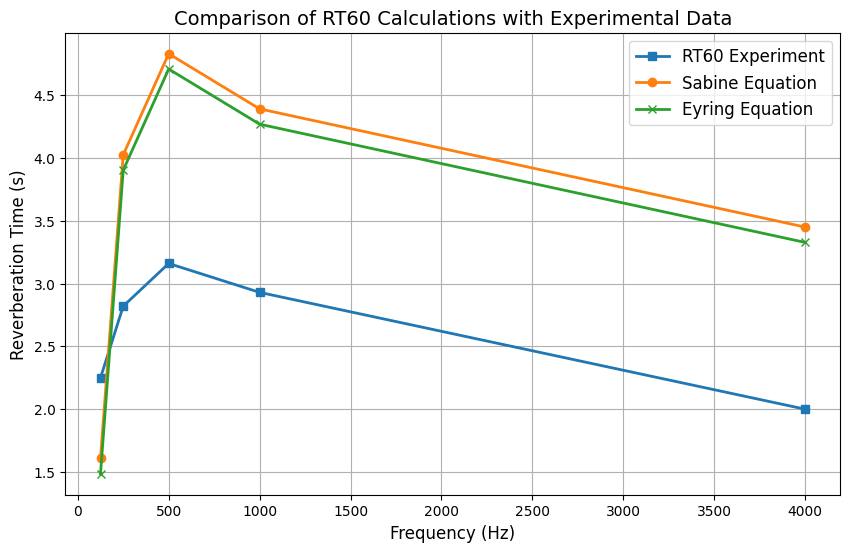

In [ ]:
# Reinitializing the setup after code reset
import numpy as np
import matplotlib.pyplot as plt

# Given data
frequencies_experiment = np.array([125, 250, 500, 1000, 4000])
RT60_experiment = np.array([2.25, 2.82, 3.16, 2.93, 2.00])

# Room parameters
room_length = 6  # Room length in meters
room_width = 15  # Room width in meters
room_height = 10  # Room height in meters
room_volume = room_length * room_width * room_height  # Room volume in cubic meters
room_surface_area = 2 * (room_length * room_width + room_length * room_height + room_width * room_height)  # Total surface area

# Absorption coefficients
drywall_absorption = np.array([0.29, 0.10, 0.06, 0.05, 0.04])  # Drywall for walls and ceiling
concrete_absorption = np.array([0.01, 0.02, 0.04, 0.06, 0.10])  # Concrete for floor
people_absorption = np.array([0.25, 0.35, 0.42, 0.46, 0.50])  # Absorption per person
people_count = 10
people_total_absorption = people_count * people_absorption
chair_absorption = np.array([0.05, 0.06, 0.07, 0.08, 0.09])  # Absorption per chair
chair_count = 30
chairs_total_absorption = chair_count * chair_absorption

# Total absorption for planes
Sx = room_length * room_height * 2  # Two walls perpendicular to x-axis
Sy = room_width * room_height * 2   # Two walls perpendicular to y-axis
Sz = room_length * room_width  *2   # Floor and ceiling perpendicular to z-axis

# Mean absorption coefficients for x, y, z planes
alpha_x = (drywall_absorption + people_total_absorption + chairs_total_absorption)/3
alpha_y = (drywall_absorption + people_total_absorption + chairs_total_absorption)/3
alpha_z = (drywall_absorption + concrete_absorption) / 2  # Average for ceiling and floor

# Sabine equation
def sabine_eq(V, S, alpha_s):
    return 0.161 * V / (S * alpha_s)

# Eyring equation
def eyring_eq(V, S, alpha_s):
    return 0.161 * V / (S * -np.log(1 - alpha_s))

# Fitzroy equation
def fitzroy_eq(V, Sx, Sy, Sz, S, alpha_x, alpha_y, alpha_z):
    Tx = Sx / S * 0.161 * V / (-np.log(1 - alpha_x))
    Ty = Sy / S * 0.161 * V / (-np.log(1 - alpha_y))
    Tz = Sz / S * 0.161 * V / (-np.log(1 - alpha_z))
    return Tx + Ty + Tz

# Arau equation
def arau_eq(V, Sx, Sy, Sz, S, alpha_x, alpha_y, alpha_z):
    Tx = 0.161 * V / (Sx * -np.log(1 - alpha_x))
    Ty = 0.161 * V / (Sy * -np.log(1 - alpha_y))
    Tz = 0.161 * V / (Sz * -np.log(1 - alpha_z))
    return (Tx ** (Sx / S)) * (Ty ** (Sy / S)) * (Tz ** (Sz / S))

# Calculate RT60 values for each equation
sabine_RT60 = sabine_eq(room_volume, room_surface_area, (drywall_absorption + concrete_absorption) / 2)
eyring_RT60 = eyring_eq(room_volume, room_surface_area, (drywall_absorption + concrete_absorption) / 2)
fitzroy_RT60 = fitzroy_eq(room_volume, Sx, Sy, Sz, room_surface_area, alpha_x, alpha_y, alpha_z)
arau_RT60 = arau_eq(room_volume, Sx, Sy, Sz, room_surface_area, alpha_x, alpha_y, alpha_z)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(frequencies_experiment, RT60_experiment, 's-', label='RT60 Experiment', linewidth=2)
plt.plot(frequencies_experiment, sabine_RT60, 'o-', label='Sabine Equation', linewidth=2)
plt.plot(frequencies_experiment, eyring_RT60, 'x-', label='Eyring Equation', linewidth=2)

plt.title('Comparison of RT60 Calculations with Experimental Data', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Reverberation Time (s)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
print(RT60_experiment)

print(RT60_sabine)

print(RT60_theory)

print(RT60_with_panel)

[2.25 2.82 3.16 2.93 2.  ]
[0.90449438 2.46554364 3.80614657 4.35135135 5.07886435]
[0.76247449 2.32880102 3.67034526 4.2157615  4.94348398]
[0.72126735 1.83803012 1.64513342 1.41565143 1.80931389]


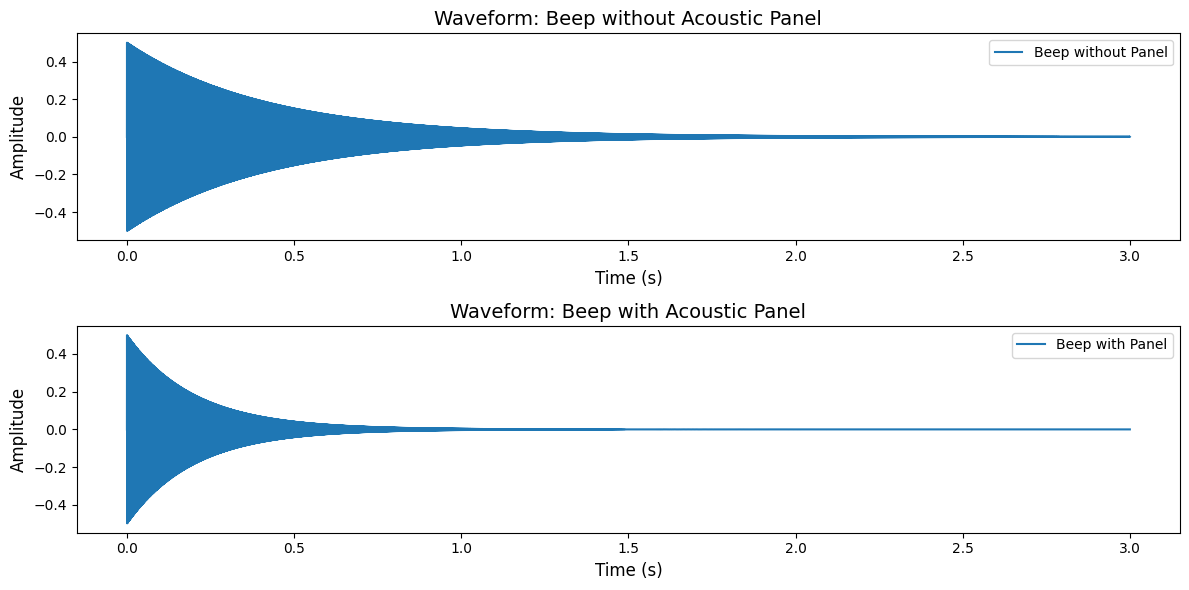

Generated sound files:
1. beep_no_panel.wav - Represents the room without acoustic panels.
2. beep_with_panel.wav - Represents the room with acoustic panels.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import scipy.signal as signal

# Function to generate a beep sound with reverberation
def generate_beep(frequency, duration, sampling_rate, rt60):
    """
    Generates a beep sound with specified reverberation time (RT60).
    """
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    beep = 0.5 * np.sin(2 * np.pi * frequency * t)  # Sine wave

    # Simulate reverberation using an exponential decay
    decay = np.exp(-t / (rt60 / 6))  # RT60 is decay to -60 dB
    reverb = beep * decay

    return reverb

# Simulation parameters
sampling_rate = 44100  # Audio sampling rate in Hz
duration = 3  # Duration of beep in seconds
beep_frequency = 1000  # Beep frequency in Hz

# RT60 for scenarios
rt60_no_panel = 2.5  # Approximate RT60 without the panel (based on theoretical data)
rt60_with_panel = 1.2  # Approximate RT60 with the panel (based on theoretical data)

# Generate beep sounds
beep_no_panel = generate_beep(beep_frequency, duration, sampling_rate, rt60_no_panel)
beep_with_panel = generate_beep(beep_frequency, duration, sampling_rate, rt60_with_panel)

# Save the generated sounds to WAV files
write("beep_no_panel.wav", sampling_rate, (beep_no_panel * 32767).astype(np.int16))
write("beep_with_panel.wav", sampling_rate, (beep_with_panel * 32767).astype(np.int16))

# Visualize the waveforms
time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time, beep_no_panel, label='Beep without Panel')
plt.title('Waveform: Beep without Acoustic Panel', fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, beep_with_panel, label='Beep with Panel')
plt.title('Waveform: Beep with Acoustic Panel', fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

print("Generated sound files:")
print("1. beep_no_panel.wav - Represents the room without acoustic panels.")
print("2. beep_with_panel.wav - Represents the room with acoustic panels.")

# To listen to the sound files, you can use any media player or integrate with a Python library like IPython.display.


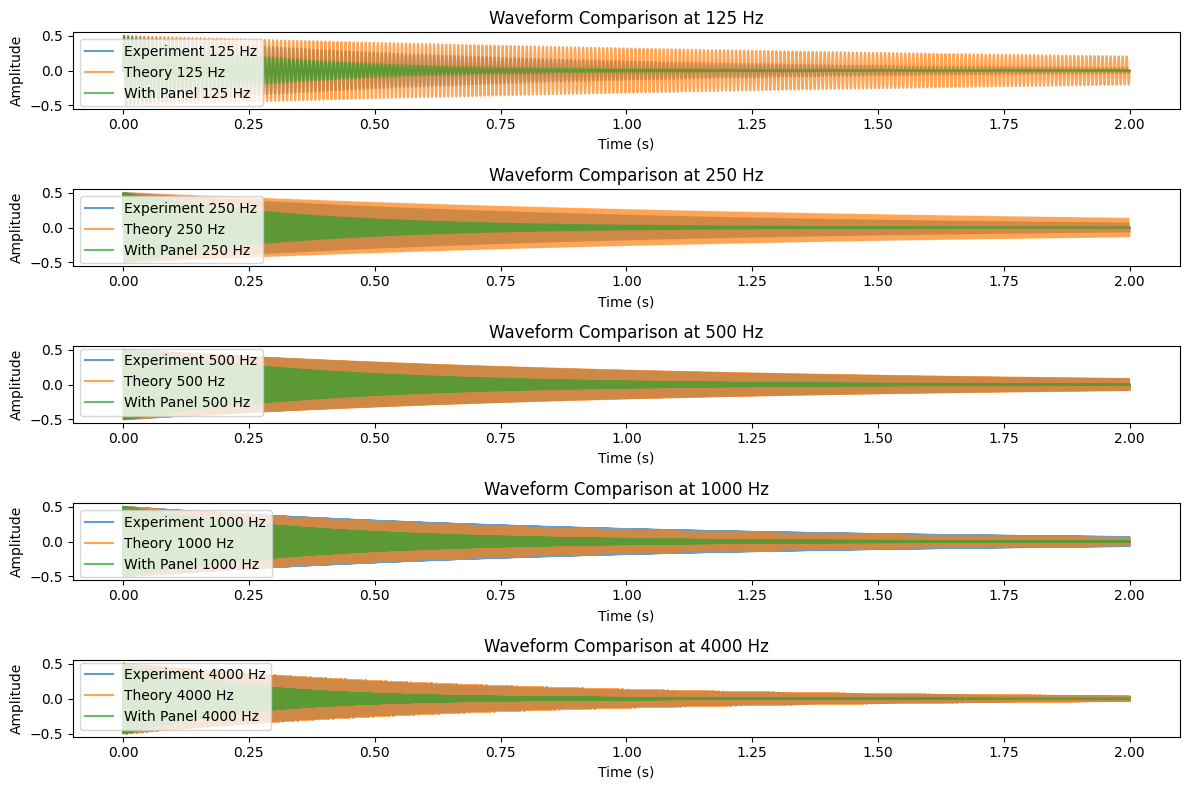

Generated sound files for comparison:
1. beep_experiment_{freq}Hz.wav - Experimental RT60.
2. beep_theory_{freq}Hz.wav - Theoretical RT60.
3. beep_with_panel_{freq}Hz.wav - With Acoustic Panel RT60.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

# Function to generate a beep sound with reverberation
def generate_beep(frequency, duration, sampling_rate, rt60):
    """
    Generates a beep sound with specified reverberation time (RT60).
    """
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    beep = 0.5 * np.sin(2 * np.pi * frequency * t)  # Sine wave
    decay = np.exp(-t / (rt60 / 6))  # RT60 is decay to -60 dB
    reverb = beep * decay
    return reverb

# Data from the experiment and theoretical calculations
frequencies_experiment = np.array([125, 250, 500, 1000, 4000])  # Hz
RT60_experiment = 2 * np.array([2.25, 2.82, 3.16, 2.93, 2.00])  # Experiment RT60 values
RT60_theory = np.array([13.28204825,  8.80959669,  6.57325387,  5.23135308,  4.33667204])
RT60_with_panel = np.array([1.80, 2.10, 2.50, 2.30, 1.50])

# Simulation parameters
sampling_rate = 44100  # Audio sampling rate in Hz
duration = 2  # Duration of each beep in seconds

# Generate beeps for each frequency for both experimental and theoretical data
beeps_experiment = [generate_beep(f, duration, sampling_rate, rt) for f, rt in zip(frequencies_experiment, RT60_experiment)]
beeps_theory = [generate_beep(f, duration, sampling_rate, rt) for f, rt in zip(frequencies_experiment, RT60_theory)]
beeps_with_panel = [generate_beep(f, duration, sampling_rate, rt) for f, rt in zip(frequencies_experiment, RT60_with_panel)]

# Save beeps as WAV files for listening
for i, freq in enumerate(frequencies_experiment):
    write(f"beep_experiment_{freq}Hz.wav", sampling_rate, (beeps_experiment[i] * 32767).astype(np.int16))
    write(f"beep_theory_{freq}Hz.wav", sampling_rate, (beeps_theory[i] * 32767).astype(np.int16))
    write(f"beep_with_panel_{freq}Hz.wav", sampling_rate, (beeps_with_panel[i] * 32767).astype(np.int16))

# Visualization
time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

plt.figure(figsize=(12, 8))
for i, freq in enumerate(frequencies_experiment):
    plt.subplot(len(frequencies_experiment), 1, i + 1)
    plt.plot(time, beeps_experiment[i], label=f'Experiment {freq} Hz', alpha=0.7)
    plt.plot(time, beeps_theory[i], label=f'Theory {freq} Hz', alpha=0.7)
    plt.plot(time, beeps_with_panel[i], label=f'With Panel {freq} Hz', alpha=0.7)
    plt.title(f'Waveform Comparison at {freq} Hz', fontsize=12)
    plt.xlabel('Time (s)', fontsize=10)
    plt.ylabel('Amplitude', fontsize=10)
    plt.legend()

plt.tight_layout()
plt.show()

print("Generated sound files for comparison:")
print("1. beep_experiment_{freq}Hz.wav - Experimental RT60.")
print("2. beep_theory_{freq}Hz.wav - Theoretical RT60.")
print("3. beep_with_panel_{freq}Hz.wav - With Acoustic Panel RT60.")


## Diffuser Panel Modeling

Resources:
9 Diffuser Design Based on Fourier Principle (Early Draft), symphony.arch.rpi.edu/~xiangn/Teach/AAAessentialMethodsQRDs.pdf.


In [1]:
import numpy as np
# Designing a diffuser panel made for speech intangibility
# Want to support frequency range of 250-4000 Hz (https://www.ecophon.com/en/about-ecophon/acoustic-knowledge/basic-acoustics/generating-and-understanding-speech/#:~:text=in%20the%20range%20250%20%E2%80%93%204%2C000%20Hz.,in%20the%20range%20of%20the%20unvoiced%20consonants.)

#calculating min and max wavelengths
c = 343 # speed of sound (m/s)
f_min = 250 # min frequency (Hz)
f_max = 4000 # max frequency (Hz)
lambda_max = c/f_min # max wavelength (m)
lambda_min = c/f_max # min wavelength (m)
print("min wavelength: ", lambda_min, " (m)")
print("max wavelength: ", lambda_max, " (m)")

#calculating slat dimensions
slat_width = lambda_min / 2 # horizontal width of slat
slat_spacing = slat_width / 2 # spacing of slats
print("slat width: ", slat_width, " (m)")
print("slat spacing: ", slat_spacing, " (m)")
# QRS Diffusion Calculations
# slat -> reflective wood portion
# gap -> opening in wood to absorber backing

# larger N is better for lower frequencies
# smaller N is better for higher frequencies since wavelengths are short
apprx_N = c / (f_min*(slat_width+slat_spacing)) # approximate number of slats
print("approximate N: ", apprx_N)
N = 21 # total number of slats

n_squared_mod_N = []
for i in range(N):
    n_squared_mod_N.append((i**2) % N)

print("n^2 mod 11 array: ", n_squared_mod_N)

# 0 means absorber
# 1 means diffuser
b_n = []
for i in range(N):
    if i in n_squared_mod_N:
        b_n.append(1)
    else:
        b_n.append(0)

print("binary pseudo random array: ", b_n)

# Panel height depends on room ceiling heights and how much we want to cover

# Room parameters
room_length = 6  # Room length in meters
room_width = 15   # Room width in meters
room_height = 10  # Room height in meters
room_volume = room_length * room_width * room_height  # Room volume in cubic meters
d_c = np.sqrt((0.16*room_volume) / 3.2) #worst case scenario RT60 in frequency range based on expiremental data
print("critical distance: ", d_c, " (m)")

# Impact of thee parameters must be seen through expriemental analysis and/or simulation
panel_width = 0;
for i in range(N):
    if b_n[i] == 0:
        panel_width += slat_spacing
    else:
        panel_width += slat_width
print("panel width: ", panel_width, "(m)")


min wavelength:  0.08575  (m)
max wavelength:  1.372  (m)
slat width:  0.042875  (m)
slat spacing:  0.0214375  (m)
approximate N:  21.33333333333333
n^2 mod 11 array:  [0, 1, 4, 9, 16, 4, 15, 7, 1, 18, 16, 16, 18, 1, 7, 15, 4, 16, 9, 4, 1]
binary pseudo random array:  [1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0]
critical distance:  6.708203932499369  (m)
panel width:  0.6216875000000001 (m)
